In [ ]:
!pip install openai opencv-python numpy


🧾 Cleaned & Structured Currency Info:
---------------------------------------------
🏦 Country: Not detected
💰 Denomination: ₹Not detected
🔢 Serial Number: Not detected
📜 Guarantee Phrase: Not detected
---------------------------------------------

📄 Full Cleaned Text:
• udu frfer5
• RESEAVE BANA
• 5
• 73B
• 625243
• {94


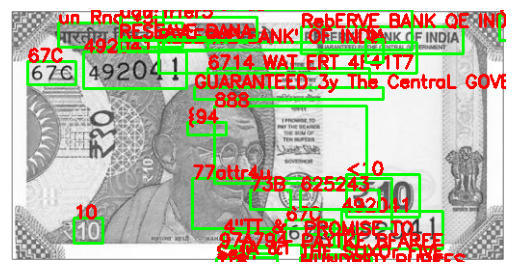

udu frfer5
RESEAVE BANA
5
73B
625243
{94


In [8]:
# Install easyocr

import easyocr
import matplotlib.pyplot as plt
import cv2

reader = easyocr.Reader(['en'])
image_path = "/content/drive/MyDrive/SEM-6/NLM/s-l400.jpg"
image = cv2.imread(image_path,0)
result = reader.readtext(image)

# Display image and overlay text boxes
# Ensure the image is in BGR format for displaying rectangles and text
### Create a copy to avoid modifying the original grayscale image

for (bbox, text, prob) in result:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(image_display, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image_display, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
# Collect raw text in sequence
raw_lines = [text for _, text, _ in result]

# Combine all into a single paragraph for search
joined_text = " ".join(raw_lines).lower()

# Extract info using keyword matching and filtering
import re

# Extract denomination
denomination_match = re.search(r"\b(10|20|50|100|200|500|2000)\b", joined_text)
denomination = denomination_match.group(0) if denomination_match else "Not detected"

# Extract serial number (2-3 capital letters + 6-7 digits)
serial_match = re.search(r"[A-Z]{1,3}\d{6,7}", joined_text.upper())
serial_number = serial_match.group(0) if serial_match else "Not detected"

# Detect "Reserve Bank of India"
is_rbi = "reserve bank of india" in joined_text

# Detect phrase like "I promise to pay..." or "Guaranteed by the central government"
has_promise = any(phrase in joined_text for phrase in [
    "promise to pay", "guaranteed by the central government"
])

# Format result
print("\n🧾 Cleaned & Structured Currency Info:\n" + "-"*45)
print(f"🏦 Country: {'India' if is_rbi else 'Not detected'}")
print(f"💰 Denomination: ₹{denomination}")
print(f"🔢 Serial Number: {serial_number}")
print(f"📜 Guarantee Phrase: {'Yes' if has_promise else 'Not detected'}")
print("-"*45)
print("\n📄 Full Cleaned Text:")
for line in raw_lines:
    print("•", line)
# Convert to RGB for matplotlib display
plt.imshow(cv2.cvtColor(image_display, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print all extracted text
for bbox, text, _ in result:
    print(text)

In [11]:
import easyocr
import cv2
import re

# Step 3: Initialize OCR reader
reader = easyocr.Reader(['en'])  # English only

# Step 4: Load image (replace with your image path)
image_path = "/content/drive/MyDrive/SEM-6/NLM/2016-2019-Mahatma-Gandhi-New-Issues-10-INR-Indian-Rupee-note-front.png"
image = cv2.imread(image_path)

# Step 5: Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 6: Perform OCR
result = reader.readtext(gray)

# Step 7: Extract all numbers
raw_texts = [text for _, text, _ in result]

# Define valid denominations (extend if needed)
valid_denominations = {'1', '2', '5', '10', '20', '50', '100', '200', '500', '2000', '5000'}

def extract_denominations(text_list, valid_set):
    found = set()
    for item in text_list:
        numbers = re.findall(r'\d+', item)
        for num in numbers:
            if num in valid_set:
                found.add(num)
    return sorted(found, key=int)

# Get only valid denominations
denominations = extract_denominations(raw_texts, valid_denominations)

# Step 8: Print result
print("💰 Detected Currency Denomination(s):")
if denominations:
    for d in denominations:
        print("• ₹" + d)
else:
    print("No valid denomination found.")

💰 Detected Currency Denomination(s):
• ₹10
